# Data Analysis
## Class 23
### Data time transformations and features
#### November 29th

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flightsOct.csv')
df.head()

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23
0,2015,10,1,AA,N797AA,1,JFK,LAX,900,1001.0,...,1301.0,51.0,0.0,NaN,0.0,370.0,360.0,324.0,2475.0,NaN
1,2015,10,2,AA,N788AA,1,JFK,LAX,900,855.0,...,1155.0,-15.0,0.0,NaN,0.0,370.0,360.0,328.0,2475.0,NaN
2,2015,10,4,AA,N794AA,1,JFK,LAX,900,854.0,...,1154.0,-16.0,0.0,NaN,0.0,370.0,360.0,322.0,2475.0,NaN
3,2015,10,5,AA,N798AA,1,JFK,LAX,900,859.0,...,1156.0,-14.0,0.0,NaN,0.0,370.0,357.0,326.0,2475.0,NaN
4,2015,10,6,AA,N799AA,1,JFK,LAX,900,856.0,...,1138.0,-32.0,0.0,NaN,0.0,370.0,342.0,316.0,2475.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486165 entries, 0 to 486164
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 486165 non-null  int64  
 1   MONTH                486165 non-null  int64  
 2   DAY_OF_MONTH         486165 non-null  int64  
 3   OP_CARRIER           486165 non-null  object 
 4   TAIL_NUM             485811 non-null  object 
 5   OP_CARRIER_FL_NUM    486165 non-null  int64  
 6   ORIGIN               486165 non-null  object 
 7   DEST                 486165 non-null  object 
 8   CRS_DEP_TIME         486165 non-null  int64  
 9   DEP_TIME             483826 non-null  float64
 10  DEP_DELAY            483826 non-null  float64
 11  TAXI_OUT             483730 non-null  float64
 12  TAXI_IN              483594 non-null  float64
 13  CRS_ARR_TIME         486165 non-null  int64  
 14  ARR_TIME             483594 non-null  float64
 15  ARR_DELAY        

In [4]:
df.CRS_DEP_TIME.astype('str').str[:2]

0         90
1         90
2         90
3         90
4         90
          ..
486160    15
486161    13
486162    17
486163    11
486164    12
Name: CRS_DEP_TIME, Length: 486165, dtype: object

In [5]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64')], dtype=object)

In [6]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'Unnamed: 23'],
      dtype='object')

In [7]:
df = pd.read_csv('flightsOct.csv', dtype={'CRS_DEP_TIME': str,
                                          'CRS_ARR_TIME': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486165 entries, 0 to 486164
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 486165 non-null  int64  
 1   MONTH                486165 non-null  int64  
 2   DAY_OF_MONTH         486165 non-null  int64  
 3   OP_CARRIER           486165 non-null  object 
 4   TAIL_NUM             485811 non-null  object 
 5   OP_CARRIER_FL_NUM    486165 non-null  int64  
 6   ORIGIN               486165 non-null  object 
 7   DEST                 486165 non-null  object 
 8   CRS_DEP_TIME         486165 non-null  object 
 9   DEP_TIME             483826 non-null  float64
 10  DEP_DELAY            483826 non-null  float64
 11  TAXI_OUT             483730 non-null  float64
 12  TAXI_IN              483594 non-null  float64
 13  CRS_ARR_TIME         486165 non-null  object 
 14  ARR_TIME             483594 non-null  float64
 15  ARR_DELAY        

In [8]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23
0,2015,10,1,AA,N797AA,1,JFK,LAX,0900,1001.0,...,1301.0,51.0,0.0,NaN,0.0,370.0,360.0,324.0,2475.0,NaN
1,2015,10,2,AA,N788AA,1,JFK,LAX,0900,855.0,...,1155.0,-15.0,0.0,NaN,0.0,370.0,360.0,328.0,2475.0,NaN
2,2015,10,4,AA,N794AA,1,JFK,LAX,0900,854.0,...,1154.0,-16.0,0.0,NaN,0.0,370.0,360.0,322.0,2475.0,NaN
3,2015,10,5,AA,N798AA,1,JFK,LAX,0900,859.0,...,1156.0,-14.0,0.0,NaN,0.0,370.0,357.0,326.0,2475.0,NaN
4,2015,10,6,AA,N799AA,1,JFK,LAX,0900,856.0,...,1138.0,-32.0,0.0,NaN,0.0,370.0,342.0,316.0,2475.0,NaN


In [9]:
df['CRS_DEP_TIME_HH'] = df.CRS_DEP_TIME.str[:2]
df['CRS_DEP_TIME_MM'] = df.CRS_DEP_TIME.str[2:]
df['CRS_DEP_TIME_SS'] = ["00"]*len(df)

In [10]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23,CRS_DEP_TIME_HH,CRS_DEP_TIME_MM,CRS_DEP_TIME_SS
0,2015,10,1,AA,N797AA,1,JFK,LAX,0900,1001.0,...,NaN,0.0,370.0,360.0,324.0,2475.0,NaN,09,00,00
1,2015,10,2,AA,N788AA,1,JFK,LAX,0900,855.0,...,NaN,0.0,370.0,360.0,328.0,2475.0,NaN,09,00,00
2,2015,10,4,AA,N794AA,1,JFK,LAX,0900,854.0,...,NaN,0.0,370.0,360.0,322.0,2475.0,NaN,09,00,00
3,2015,10,5,AA,N798AA,1,JFK,LAX,0900,859.0,...,NaN,0.0,370.0,357.0,326.0,2475.0,NaN,09,00,00
4,2015,10,6,AA,N799AA,1,JFK,LAX,0900,856.0,...,NaN,0.0,370.0,342.0,316.0,2475.0,NaN,09,00,00


In [11]:
df[["YEAR", "MONTH", "DAY_OF_MONTH", "CRS_DEP_TIME_HH", "CRS_DEP_TIME_MM", "CRS_DEP_TIME_SS"]]

,YEAR,MONTH,DAY_OF_MONTH,CRS_DEP_TIME_HH,CRS_DEP_TIME_MM,CRS_DEP_TIME_SS
0,2015,10,1,09,00,00
1,2015,10,2,09,00,00
2,2015,10,4,09,00,00
3,2015,10,5,09,00,00
4,2015,10,6,09,00,00
...,...,...,...,...,...,...
486160,2015,10,31,15,55,00
486161,2015,10,31,13,45,00
486162,2015,10,31,17,00,00
486163,2015,10,31,11,00,00


In [12]:
df['DATE_CRS_DEP_TIME'] = pd.to_datetime(df['YEAR'].astype(str) + '/' + \
                            df['MONTH'].astype(str) + '/' + \
                            df['DAY_OF_MONTH'].astype(str) + ' ' + \
                            df['CRS_DEP_TIME_HH'].astype(str) + ':' + \
                            df['CRS_DEP_TIME_MM'].astype(str) + ':' + \
                            df['CRS_DEP_TIME_SS'].astype(str))

df.DATE_CRS_DEP_TIME

0        2015-10-01 09:00:00
1        2015-10-02 09:00:00
2        2015-10-04 09:00:00
3        2015-10-05 09:00:00
4        2015-10-06 09:00:00
                 ...        
486160   2015-10-31 15:55:00
486161   2015-10-31 13:45:00
486162   2015-10-31 17:00:00
486163   2015-10-31 11:00:00
486164   2015-10-31 12:45:00
Name: DATE_CRS_DEP_TIME, Length: 486165, dtype: datetime64[ns]

<AxesSubplot: xlabel='DATE_CRS_DEP_TIME', ylabel='Count'>

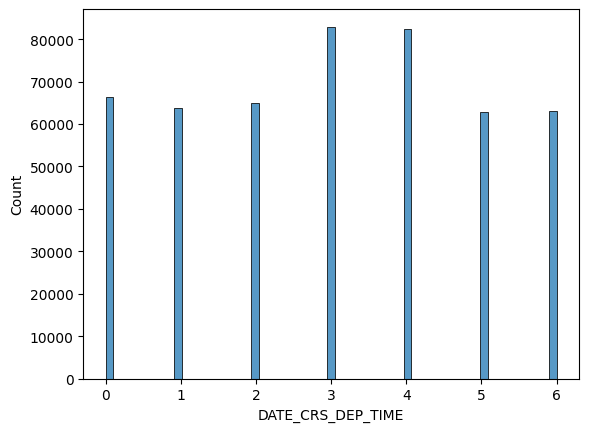

In [13]:
sns.histplot(df.DATE_CRS_DEP_TIME.dt.day_of_week)

<AxesSubplot: xlabel='DATE_CRS_DEP_TIME', ylabel='Count'>

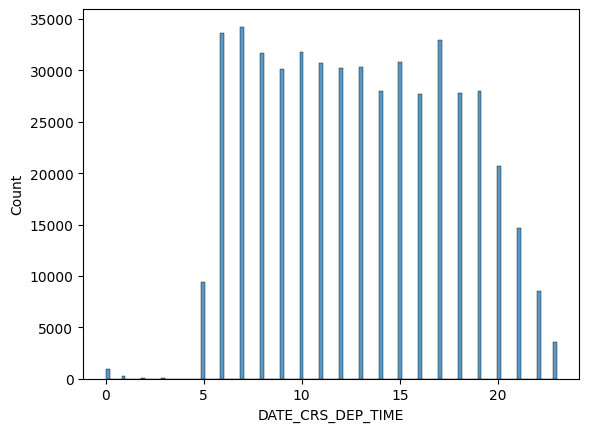

In [14]:
sns.histplot(df.DATE_CRS_DEP_TIME.dt.hour)

<AxesSubplot: xlabel='DATE_CRS_DEP_TIME', ylabel='Count'>

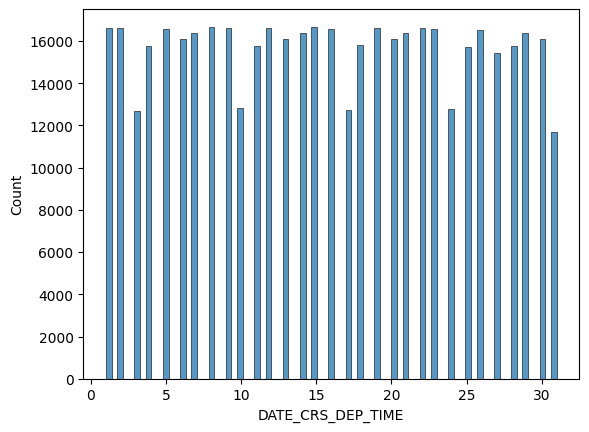

In [15]:
sns.histplot(df.DATE_CRS_DEP_TIME.dt.day)

AGREGAR HORAS MINUTOS SEGUNDOS

checar las diferencias de tiempo

explorar histogramas por dias de la semana etc

In [16]:
df['CRS_ARR_TIME_HH'] = df.CRS_ARR_TIME.str[:2]
df['CRS_ARR_TIME_MM'] = df.CRS_ARR_TIME.str[2:]
df['CRS_ARR_TIME_SS'] = ["00"]*len(df)
df.head()

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,Unnamed: 23,CRS_DEP_TIME_HH,CRS_DEP_TIME_MM,CRS_DEP_TIME_SS,DATE_CRS_DEP_TIME,CRS_ARR_TIME_HH,CRS_ARR_TIME_MM,CRS_ARR_TIME_SS
0,2015,10,1,AA,N797AA,1,JFK,LAX,0900,1001.0,...,324.0,2475.0,NaN,09,00,00,2015-10-01 09:00:00,12,10,00
1,2015,10,2,AA,N788AA,1,JFK,LAX,0900,855.0,...,328.0,2475.0,NaN,09,00,00,2015-10-02 09:00:00,12,10,00
2,2015,10,4,AA,N794AA,1,JFK,LAX,0900,854.0,...,322.0,2475.0,NaN,09,00,00,2015-10-04 09:00:00,12,10,00
3,2015,10,5,AA,N798AA,1,JFK,LAX,0900,859.0,...,326.0,2475.0,NaN,09,00,00,2015-10-05 09:00:00,12,10,00
4,2015,10,6,AA,N799AA,1,JFK,LAX,0900,856.0,...,316.0,2475.0,NaN,09,00,00,2015-10-06 09:00:00,12,10,00


In [17]:
df['DATE_ARR_DEP_TIME'] = pd.to_datetime(df['YEAR'].astype(str) + '/' + \
                            df['MONTH'].astype(str) + '/' + \
                            df['DAY_OF_MONTH'].astype(str) + ' ' + \
                            df['CRS_ARR_TIME_HH'].astype(str) + ':' + \
                            df['CRS_ARR_TIME_MM'].astype(str) + ':' + \
                            df['CRS_ARR_TIME_SS'].astype(str))

df.DATE_ARR_DEP_TIME

0        2015-10-01 12:10:00
1        2015-10-02 12:10:00
2        2015-10-04 12:10:00
3        2015-10-05 12:10:00
4        2015-10-06 12:10:00
                 ...        
486160   2015-10-31 17:20:00
486161   2015-10-31 15:10:00
486162   2015-10-31 18:25:00
486163   2015-10-31 14:25:00
486164   2015-10-31 13:30:00
Name: DATE_ARR_DEP_TIME, Length: 486165, dtype: datetime64[ns]

<AxesSubplot: xlabel='DATE_ARR_DEP_TIME', ylabel='Count'>

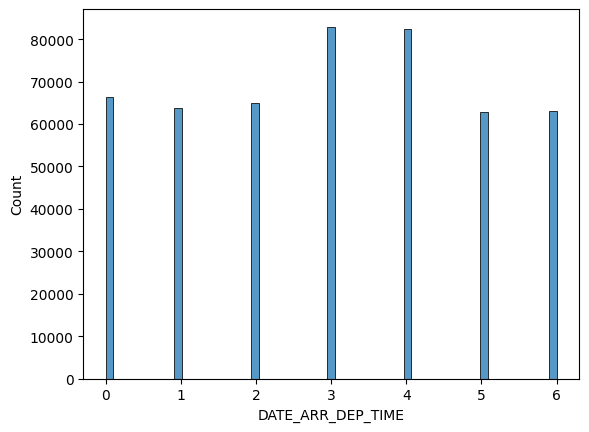

In [18]:
sns.histplot(df.DATE_ARR_DEP_TIME.dt.day_of_week)

<AxesSubplot: xlabel='DATE_ARR_DEP_TIME', ylabel='Count'>

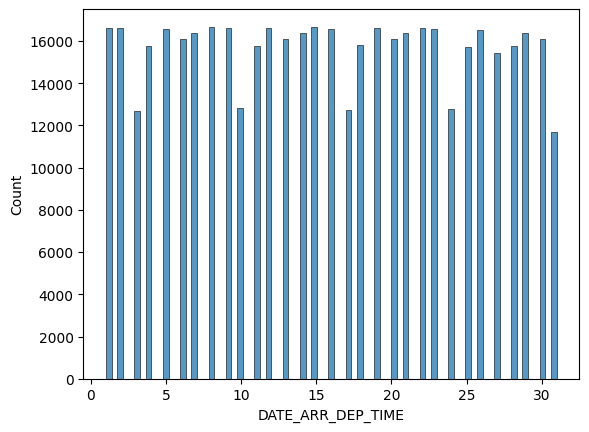

In [19]:
sns.histplot(df.DATE_ARR_DEP_TIME.dt.day)

<AxesSubplot: xlabel='DATE_ARR_DEP_TIME', ylabel='Count'>

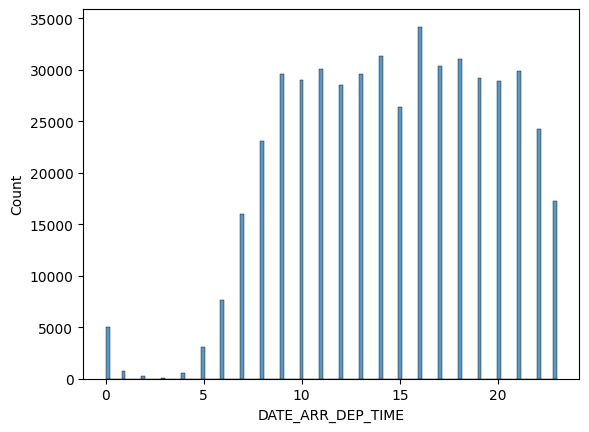

In [20]:
sns.histplot(df.DATE_ARR_DEP_TIME.dt.hour)

In [21]:
df.DATE_ARR_DEP_TIME - df.DATE_CRS_DEP_TIME

0        0 days 03:10:00
1        0 days 03:10:00
2        0 days 03:10:00
3        0 days 03:10:00
4        0 days 03:10:00
               ...      
486160   0 days 01:25:00
486161   0 days 01:25:00
486162   0 days 01:25:00
486163   0 days 03:25:00
486164   0 days 00:45:00
Length: 486165, dtype: timedelta64[ns]